In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(
    style="whitegrid",
    font_scale=1.0,
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False
    }
)

purple_palette = [
    "#DEC2FF",
    "#9671C9",
    "#7C3AED",
    "#A855F7",
    "#EC4899",
    "#752AAD",
    "#7518F5",
    "#7B26FF",
]

single_purple = "#7C3AED"

from matplotlib.colors import LinearSegmentedColormap
purple_cmap = LinearSegmentedColormap.from_list(
    "purple_cmap",
    ["#FDF2FF", "#C4B5FD", "#7C3AED", "#4C1D95"]
)

In [ ]:
wbl = pd.read_csv("wbl2024-worldbank.csv")
wbl.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,26.3,25,25,0,20,0,75,40,25
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,26.3,25,25,0,20,0,75,40,25
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,26.3,25,25,0,20,0,75,40,25
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,26.3,25,25,0,20,0,75,40,25
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,26.3,25,25,0,20,0,75,40,25


In [ ]:
wbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Economy           10260 non-null  object 
 1   Economy Code      10260 non-null  object 
 2   ISO Code          10260 non-null  object 
 3   Region            10260 non-null  object 
 4   Income Group      10260 non-null  object 
 5   Report Year       10260 non-null  int64  
 6   WBL INDEX         10260 non-null  float64
 7   MOBILITY          10260 non-null  int64  
 8   WORKPLACE         10260 non-null  int64  
 9   PAY               10260 non-null  int64  
 10  MARRIAGE          10260 non-null  int64  
 11  PARENTHOOD        10260 non-null  int64  
 12  ENTREPRENEURSHIP  10260 non-null  int64  
 13  ASSETS            10260 non-null  int64  
 14  PENSION           10260 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 1.2+ MB


In [ ]:
wbl.describe()

,Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.00000,10260.000000
mean,1997.500000,59.972914,82.112573,43.637914,48.070175,62.130604,35.210526,72.989766,73.80117,61.710526
std,15.586544,18.751019,25.634715,33.861296,31.313466,29.949148,30.825541,21.222079,29.18551,28.996069
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1984.000000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,75.000000,40.00000,25.000000
50%,1997.500000,59.400000,100.000000,25.000000,50.000000,80.000000,40.000000,75.000000,80.00000,75.000000
75%,2011.000000,73.800000,100.000000,75.000000,75.000000,80.000000,60.000000,75.000000,100.00000,75.000000
max,2024.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000


In [ ]:
wbl["Report Year"].agg(["min", "max", "nunique"])

,Report Year
min,1971
max,2024
nunique,54


In [ ]:
wbl.isna().sum()

,0
Economy,0
Economy Code,0
ISO Code,0
Region,0
Income Group,0
Report Year,0
WBL INDEX,0
MOBILITY,0
WORKPLACE,0
PAY,0


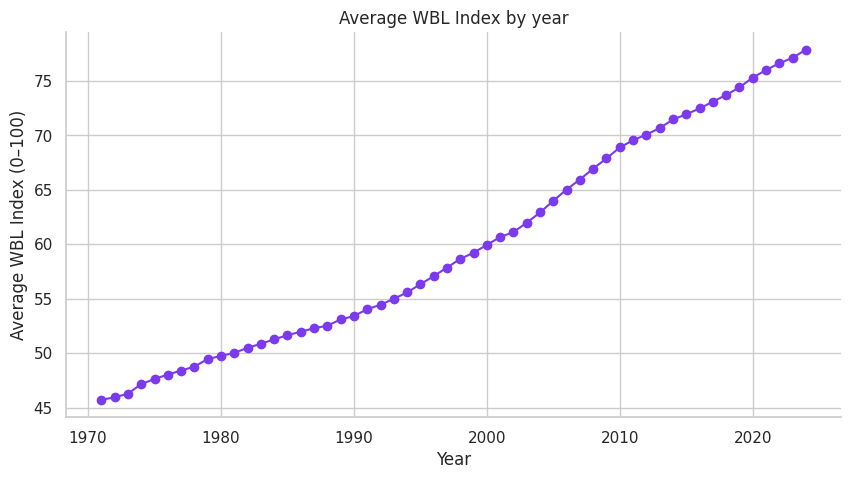

(   year   wbl_mean
 0  1971  45.716842
 1  1972  45.934737
 2  1973  46.276842
 3  1974  47.155263
 4  1975  47.626842,
     year   wbl_mean
 49  2020  75.305789
 50  2021  76.007895
 51  2022  76.623158
 52  2023  77.133684
 53  2024  77.870000)

In [ ]:
wbl_by_year = (
    wbl.groupby("Report Year", as_index=False)["WBL INDEX"]
       .mean()
       .rename(columns={"Report Year": "year",
                        "WBL INDEX": "wbl_mean"})
)

plt.figure(figsize=(10, 5))
plt.plot(wbl_by_year["year"], wbl_by_year["wbl_mean"], marker="o", color=single_purple)
plt.title("Average WBL Index by year")
plt.xlabel("Year")
plt.ylabel("Average WBL Index (0–100)")
plt.grid(True)
plt.show()

wbl_by_year.head(), wbl_by_year.tail()

/tmp/ipython-input-2230355681.py:9: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.lineplot(data=wbl_region_year,


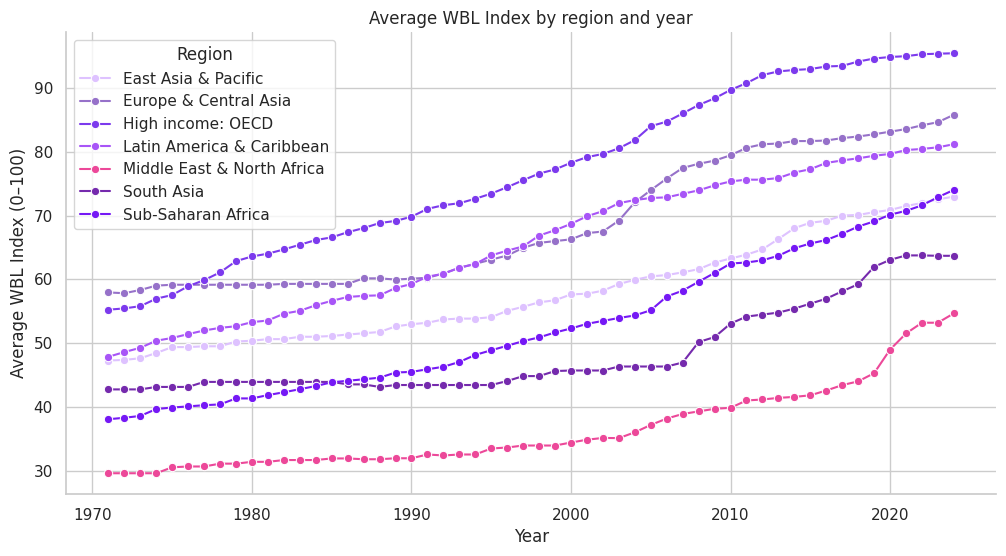

In [ ]:
wbl_region_year = (
    wbl.groupby(["Region", "Report Year"], as_index=False)["WBL INDEX"]
       .mean()
       .rename(columns={"Report Year": "year",
                        "WBL INDEX": "wbl_mean"})
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=wbl_region_year,
             x="year", y="wbl_mean", hue="Region", marker="o", palette=purple_palette)
plt.title("Average WBL Index by region and year")
plt.xlabel("Year")
plt.ylabel("Average WBL Index (0–100)")
plt.grid(True)
plt.legend(title="Region")
plt.show()

In [ ]:
latest_year = wbl["Report Year"].max()
latest = wbl[wbl["Report Year"] == latest_year].copy()

latest["WBL INDEX"].describe()

bins = [0, 20, 40, 60, 80, 100]
labels = ["0–19.9", "20–39.9", "40–59.9", "60–79.9", "80–100"]
latest["wbl_band"] = pd.cut(latest["WBL INDEX"],
                            bins=bins, labels=labels,
                            include_lowest=True)
band_counts = latest["wbl_band"].value_counts().sort_index()
band_counts

share_80plus = (latest["WBL INDEX"] >= 80).mean() * 100
share_below60 = (latest["WBL INDEX"] < 60).mean() * 100
n_100 = (latest["WBL INDEX"] >= 100 - 1e-9).sum()
len(latest), share_80plus, share_below60, n_100

(190,
 np.float64(55.26315789473685),
 np.float64(15.789473684210526),
 np.int64(14))

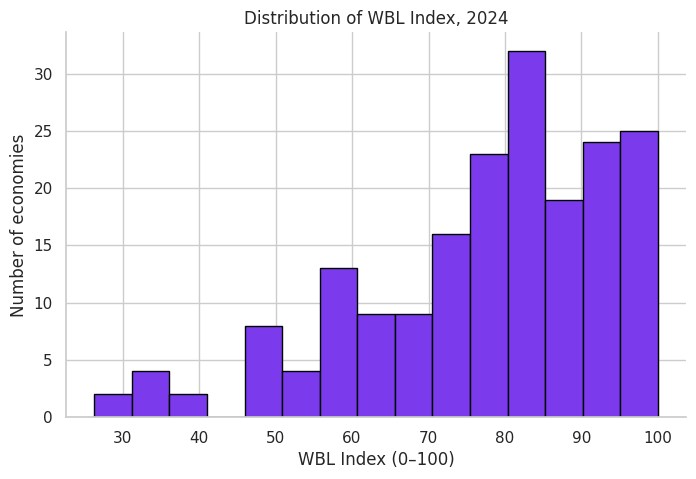

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(latest["WBL INDEX"], bins=15, edgecolor="black", color=single_purple)
plt.title("Distribution of WBL Index, 2024")
plt.xlabel("WBL Index (0–100)")
plt.ylabel("Number of economies")
plt.grid(True)
plt.show()

In [ ]:
top10 = (
    latest.sort_values("WBL INDEX", ascending=False)
          .head(10)[["Economy", "Region", "Income Group", "WBL INDEX"]]
)

bottom10 = (
    latest.sort_values("WBL INDEX", ascending=True)
          .head(10)[["Economy", "Region", "Income Group", "WBL INDEX"]]
)

top10, bottom10

(          Economy             Region Income Group  WBL INDEX
 863       Belgium  High income: OECD  High income      100.0
 1673       Canada  High income: OECD  High income      100.0
 2429      Denmark  High income: OECD  High income      100.0
 3185       France  High income: OECD  High income      100.0
 8855       Sweden  High income: OECD  High income      100.0
 8477        Spain  High income: OECD  High income      100.0
 7343     Portugal  High income: OECD  High income      100.0
 6479  Netherlands  High income: OECD  High income      100.0
 5399   Luxembourg  High income: OECD  High income      100.0
 5075       Latvia  High income: OECD  High income      100.0,
                     Economy                      Region         Income Group  \
 10097    West Bank and Gaza  Middle East & North Africa  Upper middle income   
 10151           Yemen, Rep.  Middle East & North Africa           Low income   
 4211     Iran, Islamic Rep.  Middle East & North Africa  Lower middle inc

/tmp/ipython-input-645261143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10,
/tmp/ipython-input-645261143.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top10,


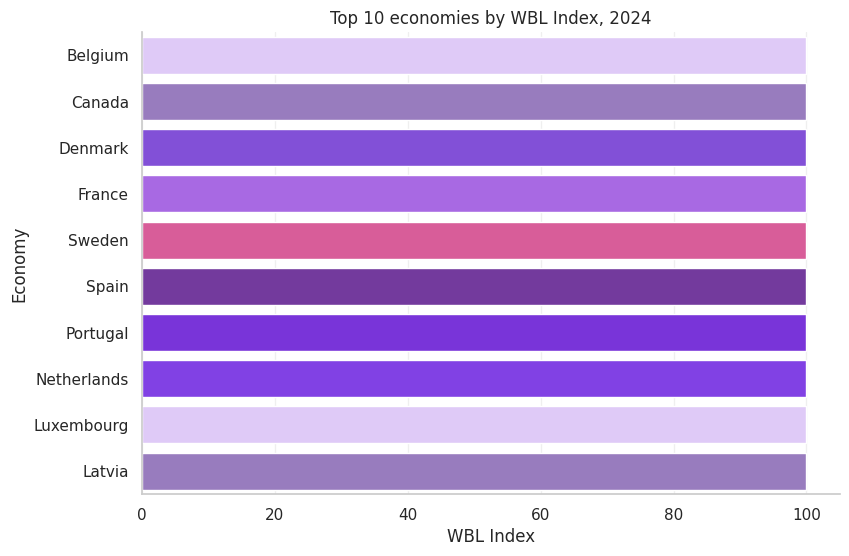

/tmp/ipython-input-645261143.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10,
/tmp/ipython-input-645261143.py:12: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=bottom10,


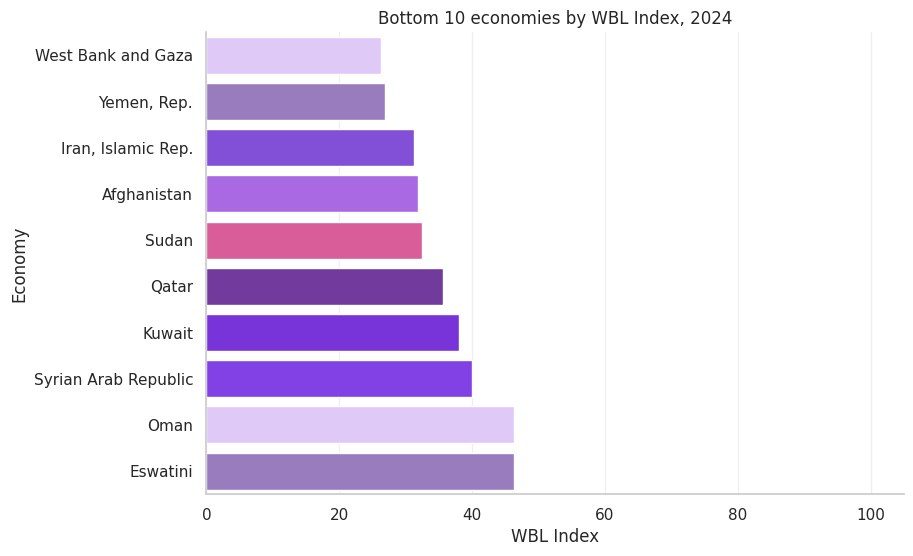

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data=top10,
            x="WBL INDEX", y="Economy", palette=purple_palette)
plt.title("Top 10 economies by WBL Index, 2024")
plt.xlabel("WBL Index")
plt.ylabel("Economy")
plt.xlim(0, 105)
plt.grid(True, axis="x", alpha=0.3)
plt.show()

plt.figure(figsize=(9,6))
sns.barplot(data=bottom10,
            x="WBL INDEX", y="Economy", palette=purple_palette)
plt.title("Bottom 10 economies by WBL Index, 2024")
plt.xlabel("WBL Index")
plt.ylabel("Economy")
plt.xlim(0, 105)
plt.grid(True, axis="x", alpha=0.3)
plt.show()

In [ ]:
latest_income = (
    latest.groupby("Income Group", as_index=False)["WBL INDEX"]
          .mean()
          .rename(columns={"WBL INDEX": "wbl_mean"})
          .sort_values("wbl_mean", ascending=False)
)

latest_income

,Income Group,wbl_mean
0,High income,87.366102
3,Not classified,85.000000
4,Upper middle income,78.292157
2,Lower middle income,71.638889
1,Low income,67.772000


/tmp/ipython-input-2650626118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_income,
/tmp/ipython-input-2650626118.py:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(data=latest_income,


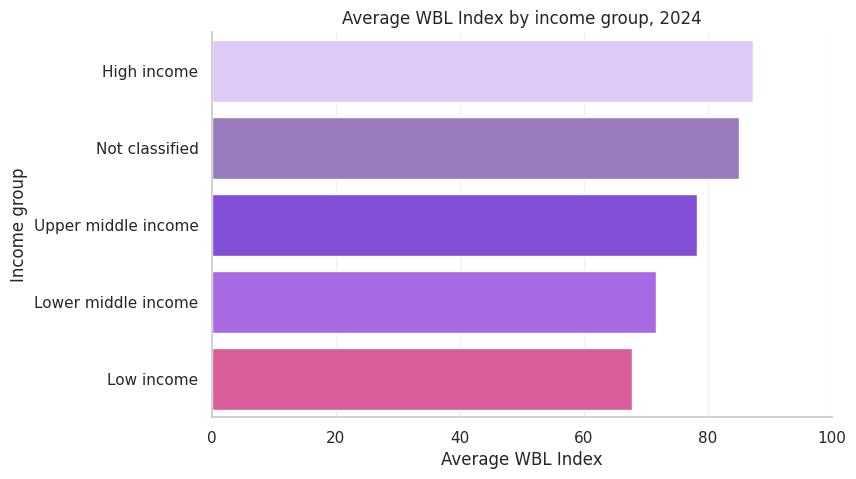

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=latest_income,
            x="wbl_mean", y="Income Group", palette=purple_palette)
plt.title("Average WBL Index by income group, 2024")
plt.xlabel("Average WBL Index")
plt.ylabel("Income group")
plt.xlim(0, 100)
plt.grid(True, axis="x", alpha=0.3)
plt.show()

In [ ]:
sub_cols = ["MOBILITY", "WORKPLACE", "PAY",
            "MARRIAGE", "PARENTHOOD",
            "ENTREPRENEURSHIP", "ASSETS", "PENSION"]

first_year = wbl["Report Year"].min()
last_year  = wbl["Report Year"].max()

world_sub_first = wbl[wbl["Report Year"] == first_year][sub_cols].mean()
world_sub_last  = wbl[wbl["Report Year"] == last_year][sub_cols].mean()

world_sub = pd.DataFrame({
    "first_year": world_sub_first.round(1),
    "last_year": world_sub_last.round(1),
    "diff": (world_sub_last - world_sub_first).round(1)
})
world_sub

,first_year,last_year,diff
MOBILITY,74.3,88.8,14.5
WORKPLACE,17.5,82.1,64.6
PAY,36.1,71.6,35.5
MARRIAGE,49.2,80.7,31.6
PARENTHOOD,17.2,58.1,40.9
ENTREPRENEURSHIP,61.2,85.7,24.5
ASSETS,63.3,81.4,18.1
PENSION,47.0,74.5,27.5


/tmp/ipython-input-907783296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diff_sorted.values, y=diff_sorted.index, palette=purple_palette)


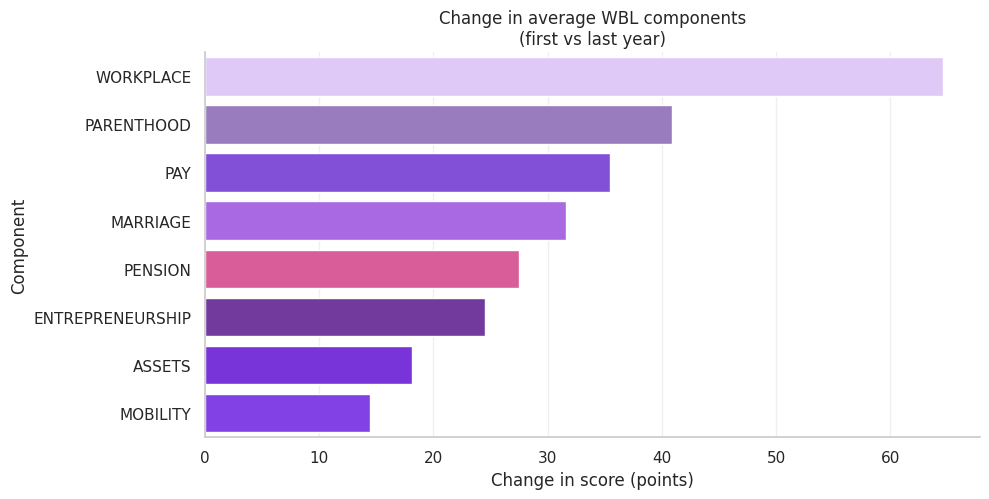

In [ ]:
plt.figure(figsize=(10,5))
diff_sorted = world_sub["diff"].sort_values(ascending=False)
sns.barplot(x=diff_sorted.values, y=diff_sorted.index, palette=purple_palette)
plt.title("Change in average WBL components\n(first vs last year)")
plt.xlabel("Change in score (points)")
plt.ylabel("Component")
plt.grid(True, axis="x", alpha=0.3)
plt.show()

In [ ]:
latest_region_sub = (
    latest.groupby("Region")[sub_cols]
          .mean()
          .reset_index()
)

latest_region_sub

,Region,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
0,East Asia & Pacific,90.000000,70.000000,73.000000,87.200000,39.200000,83.000000,71.200000,70.000000
1,Europe & Central Asia,100.000000,85.869565,70.652174,97.391304,83.478261,93.478261,100.000000,55.434783
2,High income: OECD,100.000000,97.058824,90.441176,96.470588,95.294118,97.058824,98.823529,88.235294
3,Latin America & Caribbean,92.187500,81.250000,73.437500,90.625000,49.375000,82.812500,97.500000,82.031250
4,Middle East & North Africa,57.500000,66.250000,50.000000,35.000000,38.000000,86.250000,43.000000,61.250000
5,South Asia,84.375000,84.375000,50.000000,72.500000,30.000000,78.125000,60.000000,50.000000
6,Sub-Saharan Africa,86.458333,82.812500,69.270833,72.083333,48.333333,78.125000,74.166667,80.729167


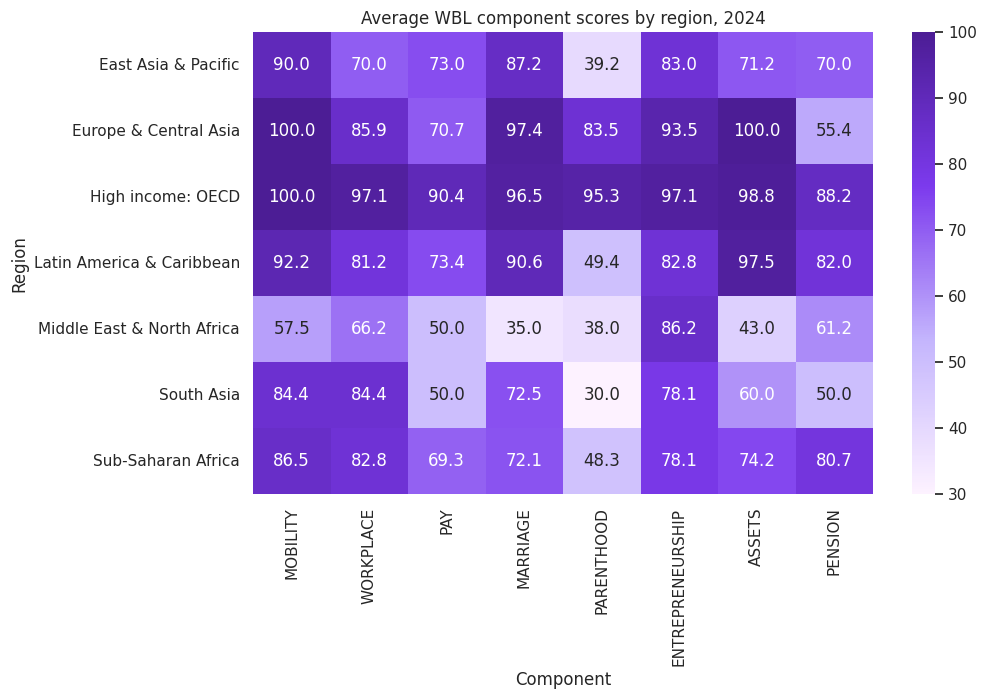

In [ ]:
plt.figure(figsize=(10,6))
heat = latest_region_sub.set_index("Region")[sub_cols]
sns.heatmap(heat, annot=True, fmt=".1f", cmap=purple_cmap)
plt.title("Average WBL component scores by region, 2024")
plt.xlabel("Component")
plt.ylabel("Region")
plt.show()

In [ ]:
first_year_country = (
    wbl.groupby("Economy", as_index=False)["Report Year"]
       .min()
       .rename(columns={"Report Year": "first_year"})
)

last_year_country = (
    wbl.groupby("Economy", as_index=False)["Report Year"]
       .max()
       .rename(columns={"Report Year": "last_year"})
)

first_scores = (
    wbl.merge(first_year_country, on="Economy")
       .query("`Report Year` == first_year")[["Economy", "WBL INDEX"]]
       .rename(columns={"WBL INDEX": "wbl_first"})
)

last_scores = (
    wbl.merge(last_year_country, on="Economy")
       .query("`Report Year` == last_year")[["Economy", "WBL INDEX"]]
       .rename(columns={"WBL INDEX": "wbl_last"})
)

change = first_scores.merge(last_scores, on="Economy", how="inner")
change["diff"] = change["wbl_last"] - change["wbl_first"]
change["pct_change"] = change["diff"] / change["wbl_first"].replace(0, np.nan) * 100

change["diff"].describe()

,diff
count,190.000000
mean,32.153158
std,14.616012
min,1.900000
25%,22.500000
50%,31.250000
75%,43.475000
max,71.900000


In [ ]:
top_improvers = change.sort_values("diff", ascending=False).head(10)
small_improvers = change.sort_values("diff", ascending=True).head(10)

top_improvers, small_improvers

(                   Economy  wbl_first  wbl_last  diff  pct_change
 171                   Togo       25.6      97.5  71.9  280.859375
 156                  Spain       33.8     100.0  66.2  195.857988
 178   United Arab Emirates       17.5      82.5  65.0  371.428571
 143  S?o Tom? and Pr?ncipe       18.8      83.1  64.3  342.021277
 154           South Africa       25.6      88.1  62.5  244.140625
 135               Portugal       39.4     100.0  60.6  153.807107
 148           Sierra Leone       31.9      92.5  60.6  189.968652
 99              Luxembourg       40.0     100.0  60.0  150.000000
 15                 Belgium       41.3     100.0  58.7  142.130751
 105                  Malta       35.0      91.3  56.3  160.857143,
                    Economy  wbl_first  wbl_last  diff  pct_change
 77      Iran, Islamic Rep.       29.4      31.3   1.9    6.462585
 110  Micronesia, Fed. Sts.       58.8      61.3   2.5    4.251701
 128                  Palau       53.8      56.3   2.5    4.6

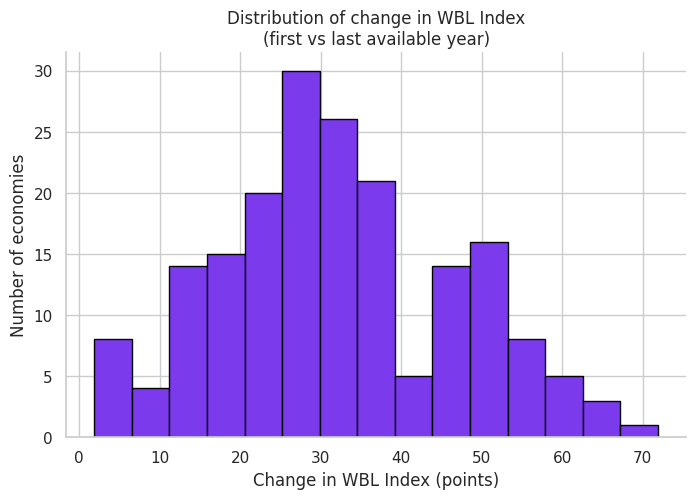

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(change["diff"], bins=15, edgecolor="black", color=single_purple)
plt.title("Distribution of change in WBL Index\n(first vs last available year)")
plt.xlabel("Change in WBL Index (points)")
plt.ylabel("Number of economies")
plt.grid(True)
plt.show()